<a href="https://colab.research.google.com/github/essexgroup31/scrappy-doo/blob/main/Copy_of_Covid19_Twitter_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Tweepy
!pip install tweepy
# Install Matplotlib
!pip install matplotlib

In [2]:
import re
import tweepy
from tweepy import OAuthHandler
consumer_api_key = 'uQP9N32xpuEIujXsDV2VgcekC'
consumer_api_secret = 'aLWDUV2P718ZoOicHCgpvQ8JUWgaOVcce14iA5oXGdtb0PsEV8' 
access_token = '1315962347836579840-gJhPtLkXpchHCz9gMXzYMl6OX9J8Cs'
access_token_secret ='iv4ld0F6E0aTCnoKihUv9RkQmAVYYZMeCYh2yT9TprbIG'
print (consumer_api_key)
print (access_token)

uQP9N32xpuEIujXsDV2VgcekC
1315962347836579840-gJhPtLkXpchHCz9gMXzYMl6OX9J8Cs


In [3]:
authorizer = OAuthHandler(consumer_api_key, consumer_api_secret)
authorizer.set_access_token(access_token, access_token_secret)

In [4]:
search_query = input("Hello user, what would you like to search?\nSearch: ")

Hello user, what would you like to search?
Search: covid19


In [5]:
api = tweepy.API(authorizer ,timeout=15)
all_tweets = []
#search_query = 'IPL2020'

for tweet_object in tweepy.Cursor(api.search,q=search_query+" -filter:retweets",lang='en',result_type='recent').items(200):
    all_tweets.append(tweet_object.text)

In [6]:
print(all_tweets)

["WE DON'T NEED NO CIVIL SERVANTS. \nWE DON'T NEED NO THOUGHT CONTROL. \n#breaking #uknews #london #brexit #talkradio… https://t.co/ZDzAIETzEi", '@YourAnonNews I want someone to ask her why she feels it is okay for President Trump to use stem cells from aborted… https://t.co/VMF7pQn5bO', '@Jeremy_Hunt @HHepplewhite When will you think Politicians understand that the PCR tests used to detect #COVID19 wa… https://t.co/I1Z3blqHTq', 'Pharma mkt rebounds in Sept, 1st time since the #Covid19 pandemic struck, helped by higher sales of chronic #drugs… https://t.co/BmOvLDw80d', 'Honestly, this is the equivalent of taking a dump on your own doorstep and then complaining about the smell. Why wo… https://t.co/zuOqeR5E0p', '#UAE Health Ministry conducts additional 103,132  #COVID19 tests detecting 1,431 new cases and records 1,652 recove… https://t.co/snzHcl1NLY', 'Sales success metrics face seismic change - @robinfisher777 VP Growth Markets @Salesforce #sales #salesmanagement… https://t.co/efWzOIX

In [7]:
import numpy as np 
import pandas as pd 
import re  
import nltk # an amazing library to play with natural language
nltk.download('stopwords')  
from nltk.corpus import stopwords 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
tweets = pd.read_csv("https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv")
print(tweets)

                 tweet_id  ...               user_timezone
0      570306133677760513  ...  Eastern Time (US & Canada)
1      570301130888122368  ...  Pacific Time (US & Canada)
2      570301083672813571  ...  Central Time (US & Canada)
3      570301031407624196  ...  Pacific Time (US & Canada)
4      570300817074462722  ...  Pacific Time (US & Canada)
...                   ...  ...                         ...
14635  569587686496825344  ...                         NaN
14636  569587371693355008  ...                         NaN
14637  569587242672398336  ...                         NaN
14638  569587188687634433  ...  Eastern Time (US & Canada)
14639  569587140490866689  ...                         NaN

[14640 rows x 15 columns]


In [9]:
X = tweets.iloc[:, 10].values
y = tweets.iloc[:, 1].values

print(X)

['@VirginAmerica What @dhepburn said.'
 "@VirginAmerica plus you've added commercials to the experience... tacky."
 "@VirginAmerica I didn't today... Must mean I need to take another trip!"
 ... '@AmericanAir Please bring American Airlines to #BlackBerry10'
 "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
 '@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?']


In [10]:
processed_tweets = []
 
for tweet in range(0, len(X)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    processed_tweets.append(processed_tweet)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(processed_tweets).toarray()


In [12]:
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [13]:
negativeCounter = 0
neutralCounter = 0
positiveCounter = 0
for tweet in all_tweets:
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', tweet)
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    sentiment = text_classifier.predict(tfidfconverter.transform([ processed_tweet]).toarray())
    

    # We need to create something that counts the different sentiments
    # Which will then be the data for the pie chart.

    if sentiment == "positive":
      positiveCounter+=1
    elif sentiment == "negative":
      negativeCounter+=1
    elif sentiment == "neutral":
      neutralCounter+=1
   
print(all_tweets)

["WE DON'T NEED NO CIVIL SERVANTS. \nWE DON'T NEED NO THOUGHT CONTROL. \n#breaking #uknews #london #brexit #talkradio… https://t.co/ZDzAIETzEi", '@YourAnonNews I want someone to ask her why she feels it is okay for President Trump to use stem cells from aborted… https://t.co/VMF7pQn5bO', '@Jeremy_Hunt @HHepplewhite When will you think Politicians understand that the PCR tests used to detect #COVID19 wa… https://t.co/I1Z3blqHTq', 'Pharma mkt rebounds in Sept, 1st time since the #Covid19 pandemic struck, helped by higher sales of chronic #drugs… https://t.co/BmOvLDw80d', 'Honestly, this is the equivalent of taking a dump on your own doorstep and then complaining about the smell. Why wo… https://t.co/zuOqeR5E0p', '#UAE Health Ministry conducts additional 103,132  #COVID19 tests detecting 1,431 new cases and records 1,652 recove… https://t.co/snzHcl1NLY', 'Sales success metrics face seismic change - @robinfisher777 VP Growth Markets @Salesforce #sales #salesmanagement… https://t.co/efWzOIX

[59, 132, 9]


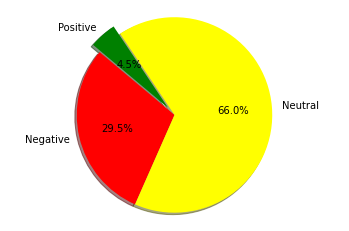

In [14]:
import matplotlib.pyplot as pyplot
labels = "Negative", "Neutral", "Positive"
sizes = [negativeCounter,neutralCounter,positiveCounter]
print(sizes)
colors = ["red","yellow","green"]

if sizes[0] > sizes[1] & sizes[0] > sizes[2]:
  explode = (0.1,0,0)
elif sizes[1] > sizes[0] & sizes[1] > sizes[2]:
  explode = (0,0.1,0)
else:
  explode = (0,0,0.1)

pyplot.pie(sizes,explode = explode, labels=labels,colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
pyplot.axis("equal")
pyplot.show()